In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from plotly import tools
import chart_studio.plotly as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Importing our data
df = pd.read_csv("german_credit_data.csv",index_col=0)
original_df = df.copy()
original_df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [3]:
df = df.rename(columns=
    {
    'Saving accounts':'Saving_accounts' ,
    'Checking account':'Checking_account' ,
    'Credit amount':'Credit_amount'
    })

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving_accounts   817 non-null    object
 5   Checking_account  606 non-null    object
 6   Credit_amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 85.9+ KB


Age                   0
Sex                   0
Job                   0
Housing               0
Saving_accounts     183
Checking_account    394
Credit_amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64


Text(0.5, 1.0, 'check null vales')

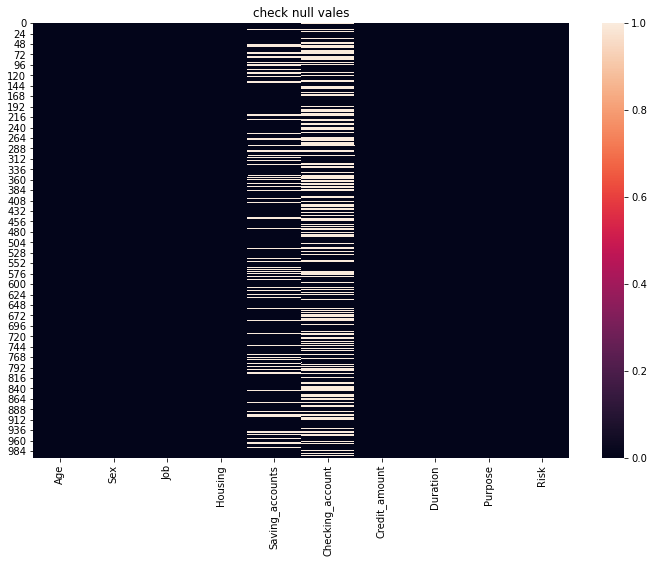

In [5]:
print(df.isnull().sum())
plt.figure(figsize=(12,8))
sns.heatmap(df.isnull())
plt.title('check null vales')

In [6]:
df.describe()

,Age,Job,Credit_amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000


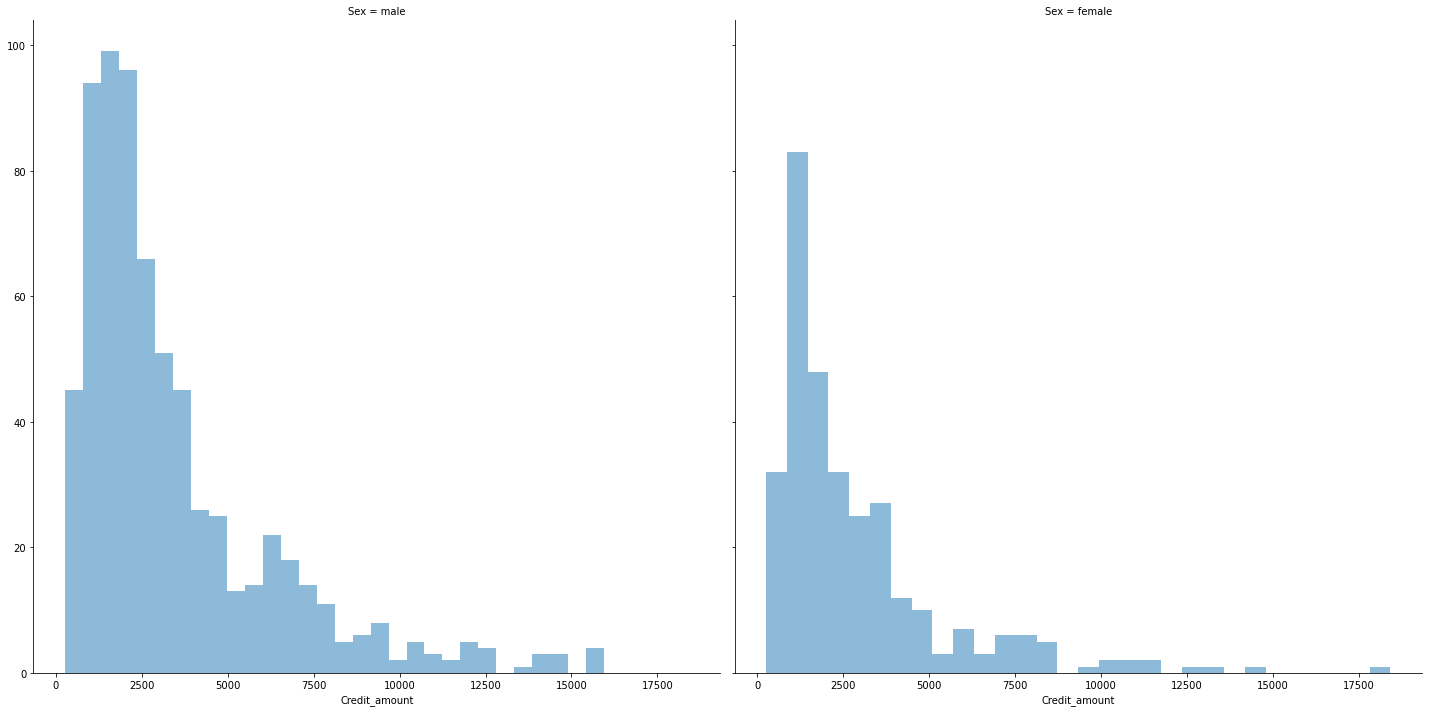

In [7]:
# histogra, of Credit_Amount for each Gender
grid = sns.FacetGrid(df, col='Sex', size=10)
grid.map(plt.hist, 'Credit_amount', alpha=.5 , bins =30)
grid.add_legend();

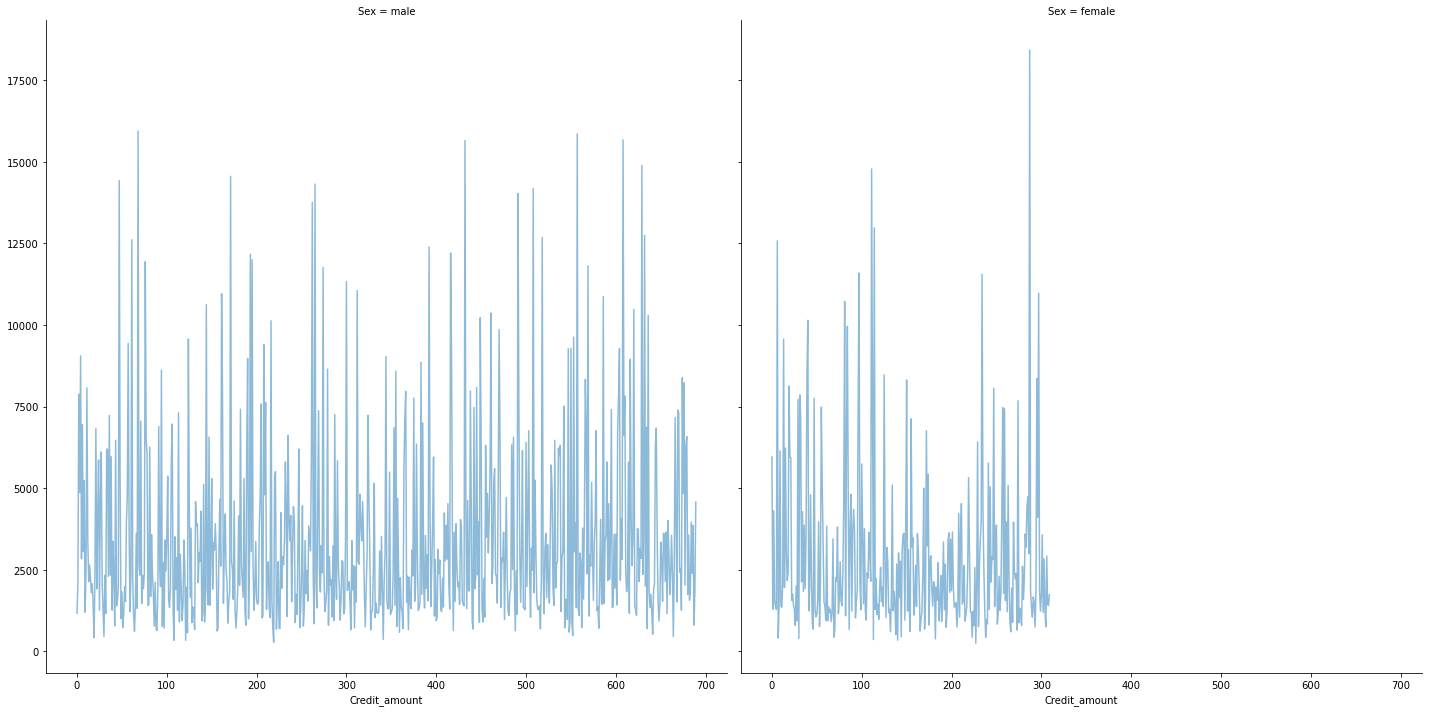

In [8]:
# plot, of Credit_Amount for each Gender
grid = sns.FacetGrid(df, col='Sex', size=10)
grid.map(plt.plot, 'Credit_amount', alpha=.5 )
grid.add_legend();

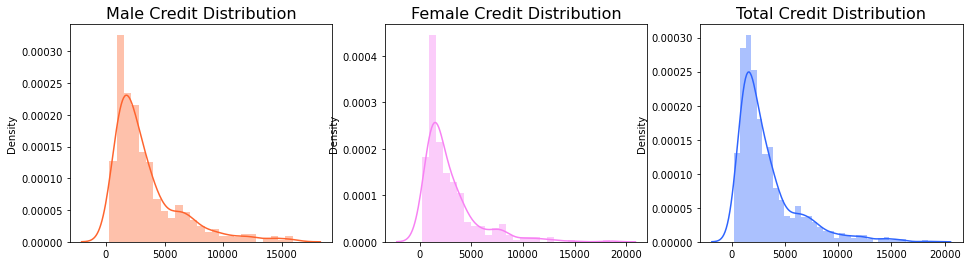

In [9]:
# Distribution of Credit_Amount for each Gender
male_credit = df["Credit_amount"].loc[df["Sex"] == "male"].values
female_credit = df["Credit_amount"].loc[df["Sex"] == "female"].values
total_credit = df['Credit_amount'].values

fig, ax = plt.subplots(1, 3, figsize=(16,4))

sns.distplot(male_credit, ax=ax[0], color="#FE642E")
ax[0].set_title("Male Credit Distribution", fontsize=16)
sns.distplot(female_credit, ax=ax[1], color="#F781F3")
ax[1].set_title("Female Credit Distribution", fontsize=16)
sns.distplot(total_credit, ax=ax[2], color="#2E64FE")
ax[2].set_title("Total Credit Distribution", fontsize=16)
plt.show()

<AxesSubplot:xlabel='Purpose', ylabel='Credit_amount'>

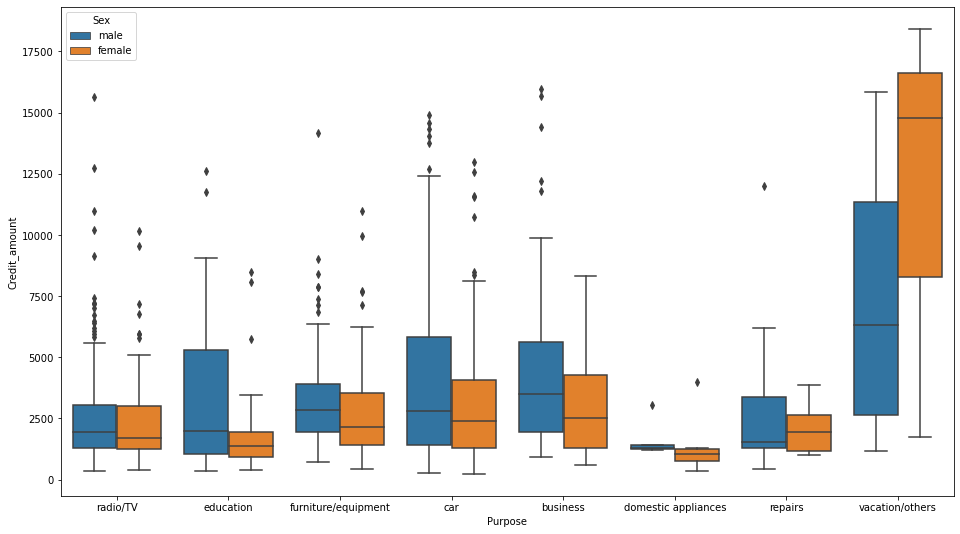

In [10]:
plt.figure(figsize=(16,9)) #figure size
sns.boxplot(x='Purpose', y='Credit_amount',hue = 'Sex', data=df)

male      690
female    310
Name: Sex, dtype: int64


Text(0.5, 1.0, 'total number of male and female')

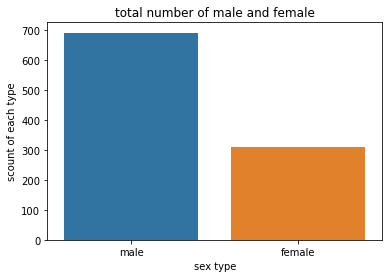

In [11]:
print(df.Sex.value_counts())
sns.countplot('Sex',data=df)
plt.xlabel('sex type')
plt.ylabel('scount of each type')
plt.title('total number of male and female')

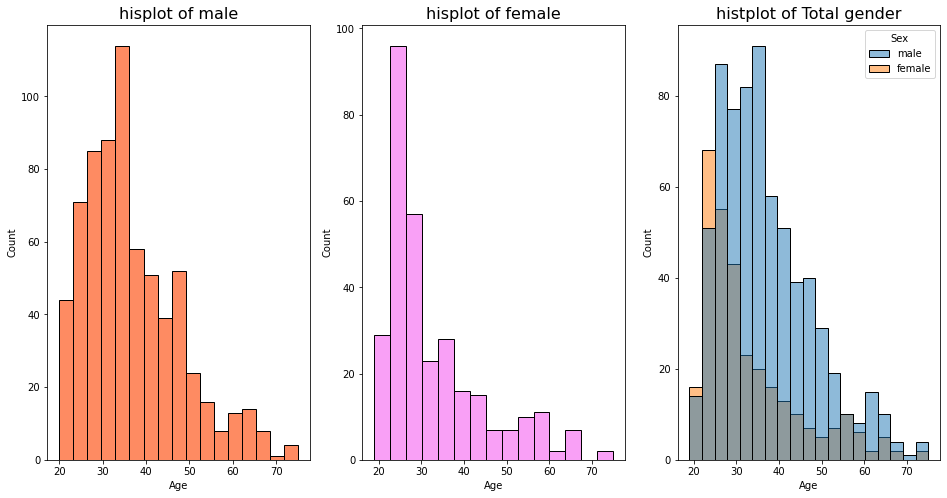

In [12]:
fig, ax = plt.subplots(1, 3, figsize=(16,8))
sns.histplot(df[df['Sex']=='male']['Age'], ax=ax[0], color="#FE642E")
ax[0].set_title("hisplot of male", fontsize=16)
sns.histplot(df[df['Sex']=='female']['Age'], ax=ax[1], color="#F781F3")
ax[1].set_title("hisplot of female", fontsize=16)
sns.histplot(data=df, x="Age", hue="Sex"  , ax=ax[2])
ax[2].set_title("histplot of Total gender", fontsize=16)
plt.show()

In [13]:
# Gender vs Purpose let's see the purpose of having credit loans for each gender.
df["Purpose"].unique()

array(['radio/TV', 'education', 'furniture/equipment', 'car', 'business',
       'domestic appliances', 'repairs', 'vacation/others'], dtype=object)

In [14]:
# Gender vs Purpose let's see the purpose of having credit loans for each gender.
sex_purpose = pd.crosstab(df['Purpose'], df['Sex'])
sex_purpose

Sex,female,male
Purpose,,
business,19,78
car,94,243
domestic appliances,6,6
education,24,35
furniture/equipment,74,107
radio/TV,85,195
repairs,5,17
vacation/others,3,9


In [15]:
sex_purpose = pd.crosstab(df['Purpose'], df['Sex']).apply(lambda x: round(x/x.sum() * 100 , 2))
sex_purpose

Sex,female,male
Purpose,,
business,6.13,11.30
car,30.32,35.22
domestic appliances,1.94,0.87
education,7.74,5.07
furniture/equipment,23.87,15.51
radio/TV,27.42,28.26
repairs,1.61,2.46
vacation/others,0.97,1.30


In [16]:
# Values into list
m_purpose = sex_purpose['male'].values.tolist()
f_purpose = sex_purpose['female'].values.tolist()
purp = sex_purpose.index.to_list()


In [17]:
def found_text(m_purpose):
    bb=''
    for i in range(len(m_purpose)):
        if i <=len(purp) -1 :
            bb += str(m_purpose[i]) + '% ,'
    bb = bb[0:-1]
    return bb.split(',')
m_txt = found_text(m_purpose)
f_txt = found_text(f_purpose)
m_txt , f_txt

(['11.3% ',
  '35.22% ',
  '0.87% ',
  '5.07% ',
  '15.51% ',
  '28.26% ',
  '2.46% ',
  '1.3% '],
 ['6.13% ',
  '30.32% ',
  '1.94% ',
  '7.74% ',
  '23.87% ',
  '27.42% ',
  '1.61% ',
  '0.97% '])

In [18]:
m_pur = go.Bar(
    x=purp,
    y=m_purpose,
    name="male",
    text=m_txt,
    textposition = 'auto',
)

f_pur =  go.Bar(
    x=purp,
    y=f_purpose,
    name="female",
    text=f_txt,
    textposition = 'auto',
)
data = [m_pur, f_pur]
layout = dict(
    title="Application Reasons for a Loan by Gender", 
    xaxis = dict(title="sex gender %"),
    yaxis= dict(title="Purpose for the Loan")
)

fig = dict(data=data, layout=layout)

iplot(fig, filename='grouped-bar-direct-labels')

we will create categorical groups based on the age column. The following categorical variables will belong to the "Age_Group" column:

    Young: Clients age ranges from (19 - 29).
    Young Adults: Clients age ranges from (30-40)
    Senior: Clients age ranges from (41-55)
    Elder: Clients age is more than 55 years old

What we want to accomplish:

    Create different age groups based on their age.
    See the Credit amounts borrowed by clients belonging to each age group.
    Get deeper in our analysis and determine which loans were high risk and see if there is any patterns with regards to age groups

In [19]:
# Ok we have to create for each group risky and non-risky loans.
df['Age_Group'] = np.nan
lst = [df]
for col in lst:
    col.loc[(col['Age'] > 18) & (col['Age'] <= 29), 'Age_Group'] = 'Young'
    col.loc[(col['Age'] > 29) & (col['Age'] <= 40), 'Age_Group'] = 'Young Adults'
    col.loc[(col['Age'] > 40) & (col['Age'] <= 55), 'Age_Group'] = 'Senior'
    col.loc[col['Age'] > 55, 'Age_Group'] = 'Elder' 
df.head()

,Age,Sex,Job,Housing,Saving_accounts,Checking_account,Credit_amount,Duration,Purpose,Risk,Age_Group
0,67,male,2,own,NaN,little,1169,6,radio/TV,good,Elder
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad,Young
2,49,male,1,own,little,NaN,2096,12,education,good,Senior
3,45,male,2,free,little,little,7882,42,furniture/equipment,good,Senior
4,53,male,2,free,little,little,4870,24,car,bad,Senior


<AxesSubplot:xlabel='Age_Group', ylabel='Credit_amount'>

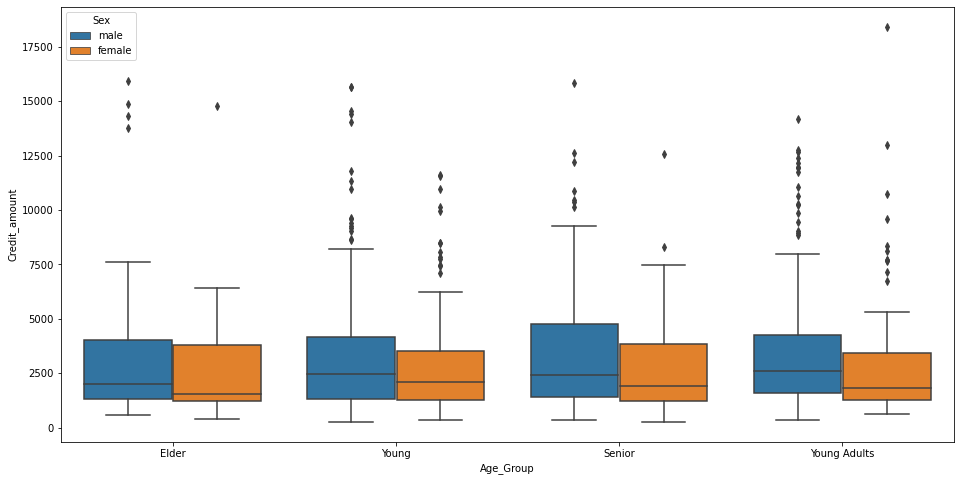

In [20]:
plt.figure(figsize=(16,8))
sns.boxplot(x='Age_Group' , y='Credit_amount' , hue='Sex' , data=df)

<AxesSubplot:xlabel='Age_Group', ylabel='Credit_amount'>

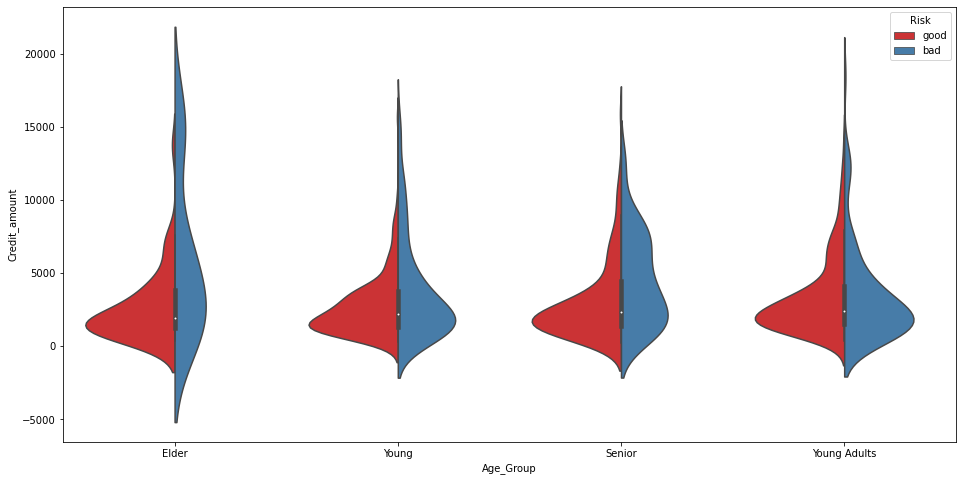

In [21]:
plt.figure(figsize=(16,8))
sns.violinplot(x='Age_Group', y='Credit_amount',hue = 'Risk', data=df,split=True,palette='Set1')

In [22]:
# Lets find loans by age group and by the level of risk 
def found_rel(df,x1,x2):
    return  df['Credit_amount'].loc[(df['Age_Group'] == x1) & (df['Risk'] == x2)].sum()

In [23]:
# Age Group Segments
young_good = found_rel(df,'Young','good')
young_bad = found_rel(df,'Young','bad') 
young_adult_good = found_rel(df,'Young Adults','good') 
young_adult_bad = found_rel(df,'Young Adults','bad') 
senior_good = found_rel(df,'Senior','good') 
senior_bad = found_rel(df,'Senior','bad') 
elder_good = found_rel(df,'Elder','good') 
elder_bad = found_rel(df,'Elder','bad') 
# Round Percents
young_good_p = str(round(young_good/(young_good + young_bad) * 100, 2))
young_bad_p = str(round(young_bad/(young_good + young_bad) * 100, 2))
young_adult_good_p = str(round(young_adult_good/(young_adult_good + young_adult_bad) * 100, 2))
young_adult_bad_p = str(round(young_adult_bad/(young_adult_good + young_adult_bad) * 100, 2))
senior_good_p = str(round(senior_good/(senior_good + senior_bad) * 100, 2))
senior_bad_p = str(round(senior_bad/(senior_good + senior_bad) * 100, 2))
elder_good_p = str(round(elder_good/(elder_good + elder_bad) * 100, 2))
elder_bad_p = str(round(elder_bad/(elder_good + elder_bad) * 100, 2))
x = ["Young", "Young Adults", "Senior", "Elder"]

In [24]:
good_loans = go.Bar(
    x=x,
    y=[young_good, young_adult_good, senior_good, elder_good],
    name="Good Loans",
    text=[young_good_p + '%', young_adult_good_p + '%', senior_good_p + '%', elder_good_p + '%'],
    textposition = 'auto',
)

bad_loans =  go.Bar(
    x=x,
    y=[young_bad, young_adult_bad, senior_bad, elder_bad],
    name="Bad Loans",
    text=[young_bad_p + '%', young_adult_bad_p + '%', senior_bad_p + '%', elder_bad_p + '%'],
    textposition = 'auto',
)
data = [good_loans, bad_loans]
layout = dict(
    title="Type of Loan by Age Group", 
    xaxis = dict(title="Age Group"),
    yaxis= dict(title="Credit Amount")
)

fig = dict(data=data, layout=layout)

iplot(fig, filename='grouped-bar-direct-labels')

In [25]:
pd.crosstab(df["Job"], df["Sex"])

Sex,female,male
Job,,
0,12,10
1,64,136
2,197,433
3,37,111


In [26]:
# Percent distribution of Gender (how many jobs does each gender have in %)
number_of_jobs = pd.crosstab(df["Job"], df["Sex"]).apply(lambda x:round( x/x.sum() * 100,2))
number_of_jobs

Sex,female,male
Job,,
0,3.87,1.45
1,20.65,19.71
2,63.55,62.75
3,11.94,16.09


In [27]:
# Values into list
m_jop = number_of_jobs['male'].values.tolist()
f_jop = number_of_jobs['female'].values.tolist()
jop = number_of_jobs.index.to_list()

In [28]:
m_txt_jop = found_text(m_jop)
f_txt_jop = found_text(f_jop)
m_txt_jop , f_txt_jop

(['1.45% ', '19.71% ', '62.75% ', '16.09% '],
 ['3.87% ', '20.65% ', '63.55% ', '11.94% '])

In [29]:
m_jo = go.Bar(
    x=jop,
    y=m_jop,
    name="male",
    text=m_txt_jop,
    textposition = 'auto',
)

f_jo =  go.Bar(
    x=jop,
    y=f_jop,
    name="female",
    text=f_txt_jop,
    textposition = 'auto',
)
data = [m_jo, f_jo]
layout = dict(
    title="jops for a Loan by Gender", 
    xaxis = dict(title="number of jops %"),
    yaxis= dict(title="percentage of each jops")
)

fig = dict(data=data, layout=layout)

iplot(fig, filename='grouped-bar-direct-labels')

In [30]:
# We have some missing value so we will just ignore the missing values in this analysis.
df["Checking_account"].unique()

array(['little', 'moderate', nan, 'rich'], dtype=object)

In [31]:
cross_checking = pd.crosstab(df['Risk'], df['Checking_account']).apply(lambda x: round(x/x.sum() * 100,2))
cross_checking

Checking_account,little,moderate,rich
Risk,,,
bad,49.27,39.03,22.22
good,50.73,60.97,77.78


In [32]:
bad_little = cross_checking['little'][0]
good_little = cross_checking['little'][1]
bad_moderate = cross_checking['moderate'][0]
good_moderate = cross_checking['moderate'][1]
bad_rich = cross_checking['rich'][0]
good_rich = cross_checking['rich'][1]
print(bad_little,good_little,bad_moderate,good_moderate,bad_rich,good_rich)

49.27 50.73 39.03 60.97 22.22 77.78


In [33]:
little = go.Bar(
    x=['Bad Risk', 'Good Risk'],
    y=[bad_little, good_little],
    name="Little Wealth",
)
moderate = go.Bar(
    x=['Bad Risk', 'Good Risk'],
    y=[bad_moderate, good_moderate],
    name="Moderate Wealth",
)
rich = go.Bar(
    x=['Bad Risk', 'Good Risk'],
    y=[bad_rich, good_rich],
    name="Rich Wealth",
)
data=[little, moderate, rich]
fig = tools.make_subplots(rows=1, cols=3, subplot_titles=('Little Wealth', 'Moderate Wealth', 'Rich Wealth'))
fig.append_trace(little, 1, 1)
fig.append_trace(moderate, 1, 2)
fig.append_trace(rich, 1, 3)
fig['layout'].update(height=400, width=800, title='Levels of Risk by Wealth')
iplot(fig, filename='make-subplots-multiple-with-titles')

In [34]:
df['Risk_int'] = df['Risk'].map({'bad': 0 , 'good':1})

In [35]:
df.dtypes

Age                  int64
Sex                 object
Job                  int64
Housing             object
Saving_accounts     object
Checking_account    object
Credit_amount        int64
Duration             int64
Purpose             object
Risk                object
Age_Group           object
Risk_int             int64
dtype: object

Text(0.5, 1.0, 'Pearson Correlation (What Determines Risk in Loans?)')

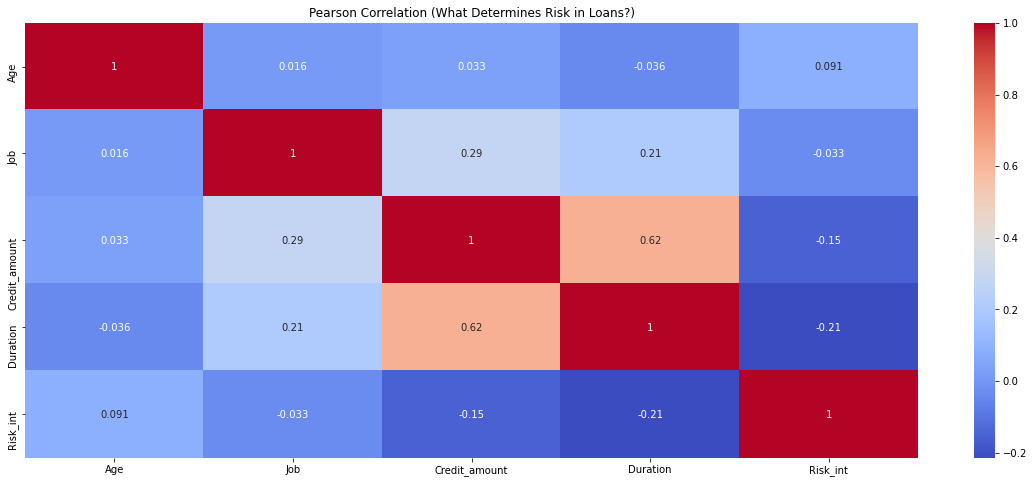

In [36]:
plt.figure(figsize=(20,8))
sns.heatmap(df.corr() , annot=True , cmap='coolwarm')
plt.title('Pearson Correlation (What Determines Risk in Loans?)')

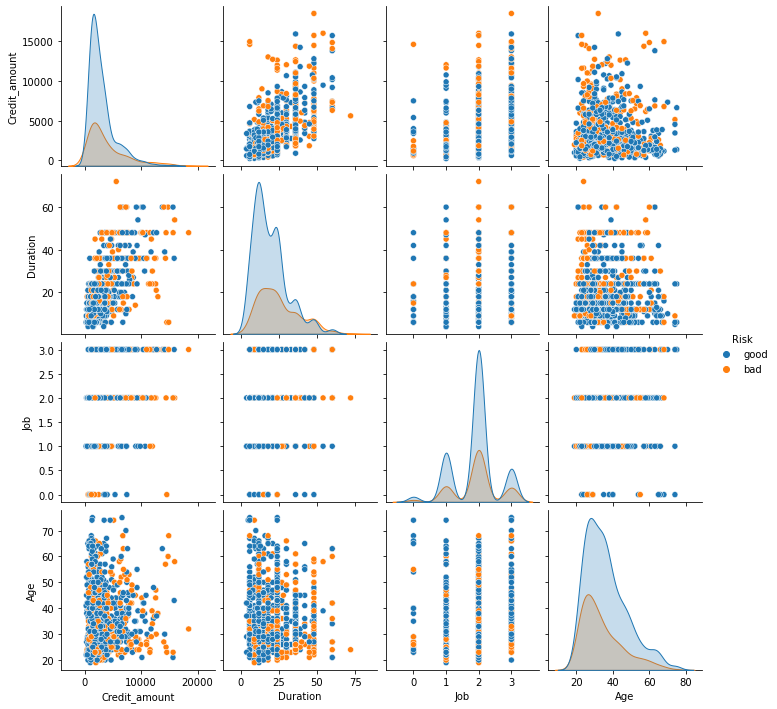

In [37]:
pair_df = df[['Credit_amount','Duration','Job','Age' ,'Risk']]
sns.pairplot(pair_df,hue='Risk')

Text(0.5, 1.0, 'Correlation Credit amount with Duration')

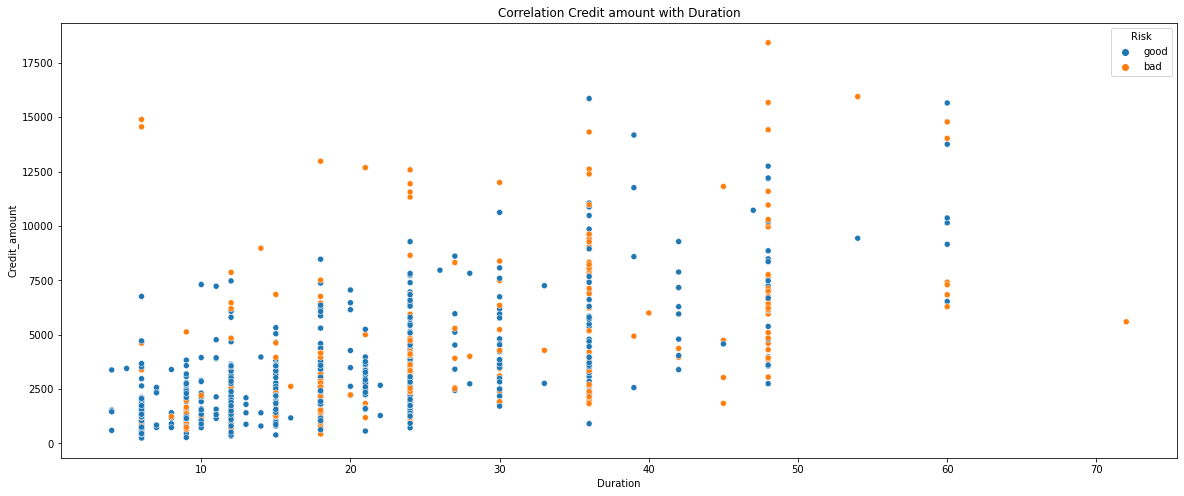

In [38]:
plt.figure(figsize=(20,8))
sns.scatterplot('Duration','Credit_amount',hue='Risk',data=df)
plt.title('Correlation Credit amount with Duration')

In [39]:
def find_things():
    out = []
    for i in df['Purpose'].unique().tolist() :
        out.append(np.sum(df['Credit_amount'].loc[df['Purpose'] == i].values))
    return out

In [40]:
data = [
    go.Scatterpolar(
        r = find_things(),
        theta = df['Purpose'].unique().tolist(),
        fill='toself',
    )
]
layout = go.Layout(
    title= "Credit Distribution by Purpose"
)
fig = dict(data=data, layout=layout)
iplot(fig)

In [41]:
df['Purpose'].unique().tolist()

['radio/TV',
 'education',
 'furniture/equipment',
 'car',
 'business',
 'domestic appliances',
 'repairs',
 'vacation/others']

In [42]:
find_things()

[696543, 169873, 555125, 1269881, 403330, 17976, 60018, 98512]

In [43]:
cross_purpose = pd.crosstab(df['Purpose'], df['Risk']).apply(lambda x: round(x/x.sum() * 100,2))
cross_purpose

Risk,bad,good
Purpose,,
business,11.33,9.00
car,35.33,33.00
domestic appliances,1.33,1.14
education,7.67,5.14
furniture/equipment,19.33,17.57
radio/TV,20.67,31.14
repairs,2.67,2.00
vacation/others,1.67,1.00


In [44]:
cross_purpose.sort_values(by=['bad'])

Risk,bad,good
Purpose,,
domestic appliances,1.33,1.14
vacation/others,1.67,1.00
repairs,2.67,2.00
education,7.67,5.14
business,11.33,9.00
furniture/equipment,19.33,17.57
radio/TV,20.67,31.14
car,35.33,33.00


In [45]:
# Values into list
b_Purpose = cross_purpose['bad'].values.tolist()
g_Purpose = cross_purpose['good'].values.tolist()
Purpos = cross_purpose.index.to_list()
b_txt_Purpose = found_text(b_Purpose)
g_txt_Purpose = found_text(g_Purpose)
print(Purpos)
print(b_txt_Purpose )
print(g_txt_Purpose)

['business', 'car', 'domestic appliances', 'education', 'furniture/equipment', 'radio/TV', 'repairs', 'vacation/others']
['11.33% ', '35.33% ', '1.33% ', '7.67% ', '19.33% ', '20.67% ', '2.67% ', '1.67% ']
['9.0% ', '33.0% ', '1.14% ', '5.14% ', '17.57% ', '31.14% ', '2.0% ', '1.0% ']


In [46]:
b_pr = go.Bar(
    x=Purpos,
    y=b_Purpose,
    name="bad risk",
    text=b_txt_Purpose,
    textposition = 'auto',
)
g_pr =  go.Bar(
    x=Purpos,
    y=g_Purpose,
    name="good risk",
    text=g_txt_Purpose,
    textposition = 'auto',
)
data = [b_pr, g_pr]
layout = dict(
    title='Which Purpose Carried the Highest Risk?', 
    yaxis= dict(title="percentage of each risk")
)
fig = dict(data=data, layout=layout)
iplot(fig, filename='grouped-bar-direct-labels')

In [47]:
cross_credit = df.groupby(['Risk', 'Purpose'], as_index=False).Credit_amount.sum()
good_amnt = cross_credit["Credit_amount"].loc[cross_credit["Risk"] == "good"].values.tolist()
bad_amnt = cross_credit["Credit_amount"].loc[cross_credit["Risk"] == "bad"].values.tolist()
cross_credit

,Risk,Purpose,Credit_amount
0,bad,business,191163
1,bad,car,447527
2,bad,domestic appliances,6284
3,bad,education,72493
4,bad,furniture/equipment,211439
5,bad,radio/TV,172373
6,bad,repairs,22329
7,bad,vacation/others,57830
8,good,business,212167
9,good,car,822354


In [48]:
print(good_amnt)
print(bad_amnt)

[212167, 822354, 11692, 97380, 343686, 524170, 37689, 40682]
[191163, 447527, 6284, 72493, 211439, 172373, 22329, 57830]


In [49]:
good_risk = {"x": good_amnt, 
          "y": Purpos, 
          "marker": {"color": "rgb(28, 98, 98)", "size": 12}, 
          "mode": "markers", 
          "name": "Good Risk", 
          "type": "scatter"
}

bad_risk = {"x": bad_amnt, 
          "y": Purpos, 
          "marker": {"color": "rgb(98, 28, 28)", "size": 12}, 
          "mode": "markers", 
          "name": "Bad Risk", 
          "type": "scatter", 
}

data = [good_risk, bad_risk]
layout = {"title": "Credit Loan Applications by Purpose", 
          "xaxis": {"title": "Credit Amount Borrowed", }, 
          "yaxis": {"title": ""},
         "width": 800,
         "height": 700}

fig = dict(data=data, layout=layout)
iplot(fig, filename='basic_dot-plot')

In [50]:
df['Checking_account'].fillna('little',inplace=True)
df['Saving_accounts'].fillna('little',inplace=True)

In [51]:
df.isnull().sum()

Age                 0
Sex                 0
Job                 0
Housing             0
Saving_accounts     0
Checking_account    0
Credit_amount       0
Duration            0
Purpose             0
Risk                0
Age_Group           0
Risk_int            0
dtype: int64

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving_accounts   1000 non-null   object
 5   Checking_account  1000 non-null   object
 6   Credit_amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
 10  Age_Group         1000 non-null   object
 11  Risk_int          1000 non-null   int64 
dtypes: int64(5), object(7)
memory usage: 141.6+ KB


In [53]:
df.drop('Risk',inplace=True, axis=1)

In [54]:
df['Age_Group'] = df['Age_Group'].map({"Young":0 , "Young Adults":1 , "Senior":2 ,"Elder":3})
df['Saving_accounts'] = df['Saving_accounts'].map({"little":0 , "moderate":1 , "quite rich":2 ,"rich":3})
df['Checking_account'] = df['Checking_account'].map({"little":0 , "moderate":1 ,"rich":2})
df['Housing'] = df['Housing'].map({"own":0 , "rent":1 ,"free":2})
df['Sex'] = df['Sex'].map({"male":0 , "female":1})
df['Purpose']=df['Purpose'].map(dict(tuple(zip(purp , [i for i in range(len(purp))]))))

In [55]:
df.head()

,Age,Sex,Job,Housing,Saving_accounts,Checking_account,Credit_amount,Duration,Purpose,Age_Group,Risk_int
0,67,0,2,0,0,0,1169,6,5,3,1
1,22,1,2,0,0,1,5951,48,5,0,0
2,49,0,1,0,0,0,2096,12,3,2,1
3,45,0,2,2,0,0,7882,42,4,2,1
4,53,0,2,2,0,0,4870,24,1,2,0


In [56]:
X = df.drop('Risk_int', axis=1)
y = df['Risk_int']
X.head()

,Age,Sex,Job,Housing,Saving_accounts,Checking_account,Credit_amount,Duration,Purpose,Age_Group
0,67,0,2,0,0,0,1169,6,5,3
1,22,1,2,0,0,1,5951,48,5,0
2,49,0,1,0,0,0,2096,12,3,2
3,45,0,2,2,0,0,7882,42,4,2
4,53,0,2,2,0,0,4870,24,1,2


In [57]:
from sklearn.model_selection import train_test_split

In [58]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

In [59]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(800, 10) (200, 10) (800,) (200,)


In [60]:
# machine learning 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix , accuracy_score

In [61]:
import numpy as np
import itertools
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize = (6,6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    cm = np.round(cm,2)
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

# Logistic Regression 

accuracy : 67.5 %


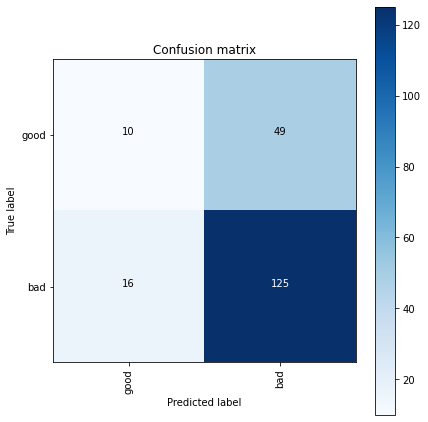

In [62]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
Y_pred = logreg.predict(X_test)
cf = confusion_matrix(y_test , Y_pred)
acc_log = accuracy_score(y_test , Y_pred)* 100
print("accuracy : {} %".format(acc_log ))
plot_confusion_matrix(cf,['good','bad'])

# svm

accuracy : 71.5 %


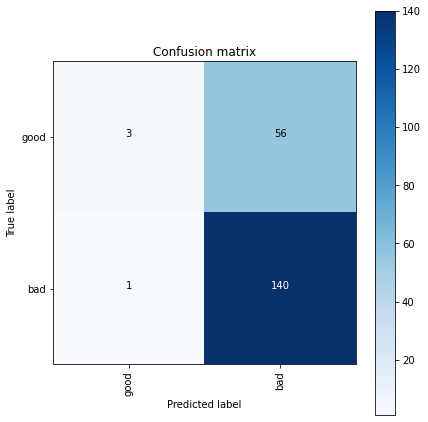

In [63]:
svc = SVC()
svc.fit(X_train, y_train)
Y_pred = svc.predict(X_test)
cf = confusion_matrix(y_test , Y_pred)
acc_svc = accuracy_score(y_test , Y_pred)* 100
print("accuracy : {} %".format(acc_svc ))
plot_confusion_matrix(cf,['good','bad'])

# grid search

In [64]:
param_grid = {'C': [0.75, 0.85, 0.95, 1], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'degree': [3, 4, 5]}


In [65]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)

In [66]:
# May take awhile!
grid.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] C=0.75, degree=3, kernel=linear .................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ..... C=0.75, degree=3, kernel=linear, score=0.694, total= 1.0min
[CV] C=0.75, degree=3, kernel=linear .................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.0min remaining:    0.0s


[CV] ..... C=0.75, degree=3, kernel=linear, score=0.713, total=  55.6s
[CV] C=0.75, degree=3, kernel=linear .................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  2.0min remaining:    0.0s


[CV] ..... C=0.75, degree=3, kernel=linear, score=0.656, total= 1.0min
[CV] C=0.75, degree=3, kernel=linear .................................
[CV] ..... C=0.75, degree=3, kernel=linear, score=0.700, total= 2.3min
[CV] C=0.75, degree=3, kernel=linear .................................
[CV] ..... C=0.75, degree=3, kernel=linear, score=0.725, total=  26.9s
[CV] C=0.75, degree=3, kernel=poly ...................................
[CV] ....... C=0.75, degree=3, kernel=poly, score=0.694, total=   0.0s
[CV] C=0.75, degree=3, kernel=poly ...................................
[CV] ....... C=0.75, degree=3, kernel=poly, score=0.688, total=   0.0s
[CV] C=0.75, degree=3, kernel=poly ...................................
[CV] ....... C=0.75, degree=3, kernel=poly, score=0.706, total=   0.0s
[CV] C=0.75, degree=3, kernel=poly ...................................
[CV] ....... C=0.75, degree=3, kernel=poly, score=0.706, total=   0.0s
[CV] C=0.75, degree=3, kernel=poly ...................................
[CV] .

[CV] ..... C=0.85, degree=3, kernel=linear, score=0.681, total= 2.2min
[CV] C=0.85, degree=3, kernel=linear .................................
[CV] ..... C=0.85, degree=3, kernel=linear, score=0.725, total=  52.2s
[CV] C=0.85, degree=3, kernel=linear .................................
[CV] ..... C=0.85, degree=3, kernel=linear, score=0.656, total=  57.5s
[CV] C=0.85, degree=3, kernel=linear .................................
[CV] ..... C=0.85, degree=3, kernel=linear, score=0.688, total=  59.4s
[CV] C=0.85, degree=3, kernel=linear .................................
[CV] ..... C=0.85, degree=3, kernel=linear, score=0.713, total= 2.1min
[CV] C=0.85, degree=3, kernel=poly ...................................
[CV] ....... C=0.85, degree=3, kernel=poly, score=0.694, total=   0.0s
[CV] C=0.85, degree=3, kernel=poly ...................................
[CV] ....... C=0.85, degree=3, kernel=poly, score=0.688, total=   0.0s
[CV] C=0.85, degree=3, kernel=poly ...................................
[CV] .

[CV] ..... C=0.95, degree=3, kernel=linear, score=0.681, total= 1.3min
[CV] C=0.95, degree=3, kernel=linear .................................
[CV] ..... C=0.95, degree=3, kernel=linear, score=0.731, total= 2.0min
[CV] C=0.95, degree=3, kernel=linear .................................
[CV] ..... C=0.95, degree=3, kernel=linear, score=0.656, total= 2.3min
[CV] C=0.95, degree=3, kernel=linear .................................
[CV] ..... C=0.95, degree=3, kernel=linear, score=0.713, total= 1.2min
[CV] C=0.95, degree=3, kernel=linear .................................
[CV] ..... C=0.95, degree=3, kernel=linear, score=0.731, total= 1.8min
[CV] C=0.95, degree=3, kernel=poly ...................................
[CV] ....... C=0.95, degree=3, kernel=poly, score=0.694, total=   0.0s
[CV] C=0.95, degree=3, kernel=poly ...................................
[CV] ....... C=0.95, degree=3, kernel=poly, score=0.688, total=   0.0s
[CV] C=0.95, degree=3, kernel=poly ...................................
[CV] .

[CV] ........ C=1, degree=3, kernel=linear, score=0.681, total= 1.5min
[CV] C=1, degree=3, kernel=linear ....................................
[CV] ........ C=1, degree=3, kernel=linear, score=0.700, total= 1.2min
[CV] C=1, degree=3, kernel=linear ....................................
[CV] ........ C=1, degree=3, kernel=linear, score=0.656, total=  49.6s
[CV] C=1, degree=3, kernel=linear ....................................
[CV] ........ C=1, degree=3, kernel=linear, score=0.713, total= 1.5min
[CV] C=1, degree=3, kernel=linear ....................................
[CV] ........ C=1, degree=3, kernel=linear, score=0.738, total= 1.0min
[CV] C=1, degree=3, kernel=poly ......................................
[CV] .......... C=1, degree=3, kernel=poly, score=0.694, total=   0.0s
[CV] C=1, degree=3, kernel=poly ......................................
[CV] .......... C=1, degree=3, kernel=poly, score=0.688, total=   0.0s
[CV] C=1, degree=3, kernel=poly ......................................
[CV] .

[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed: 83.3min finished


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.75, 0.85, 0.95, 1], 'degree': [3, 4, 5],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             verbose=3)

In [67]:
grid.best_params_

{'C': 0.95, 'degree': 5, 'kernel': 'poly'}

In [68]:
grid.best_estimator_

SVC(C=0.95, degree=5, kernel='poly')

In [69]:
grid_predictions = grid.predict(X_test)

accuracy : 71.5 %


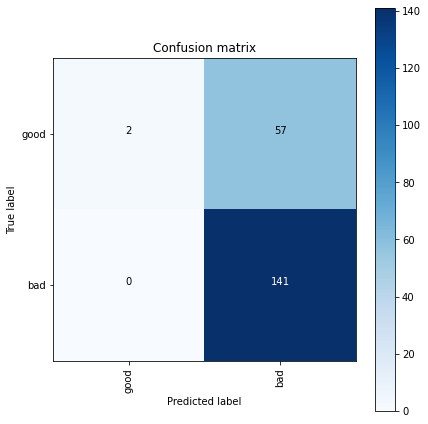

In [71]:
cf = confusion_matrix(y_test , grid_predictions)
acc_grid = accuracy_score(y_test , grid_predictions)* 100
print("accuracy : {} %".format(acc_grid ))
plot_confusion_matrix(cf,['good','bad'])

# the k-Nearest Neighbors algorithm

accuracy : 62.5 %


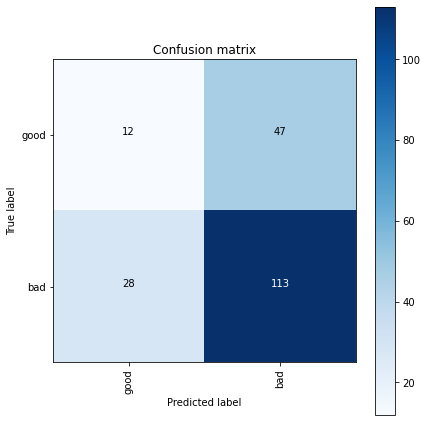

In [72]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
Y_pred = knn.predict(X_test)
cf = confusion_matrix(y_test , Y_pred)
acc_knn = accuracy_score(y_test , Y_pred)* 100
print("accuracy : {} %".format(acc_knn ))
plot_confusion_matrix(cf,['good','bad'])

# Gaussian Naive Bayes

accuracy : 64.5 %


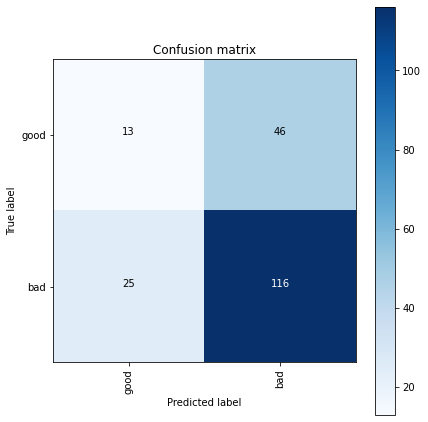

In [73]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
Y_pred = gaussian.predict(X_test)
cf = confusion_matrix(y_test , Y_pred)
acc_gaussian = accuracy_score(y_test , Y_pred)* 100
print("accuracy : {} %".format(acc_gaussian ))
plot_confusion_matrix(cf,['good','bad'])

# Perceptron

accuracy : 70.5 %


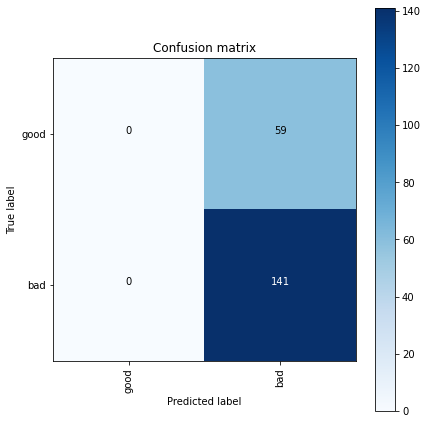

In [74]:
perceptron = Perceptron()
perceptron.fit(X_train, y_train)
Y_pred = perceptron.predict(X_test)
cf = confusion_matrix(y_test , Y_pred)
acc_perceptron= accuracy_score(y_test , Y_pred)* 100
print("accuracy : {} %".format(acc_perceptron ))
plot_confusion_matrix(cf,['good','bad'])

# Linear SVC

accuracy : 70.5 %


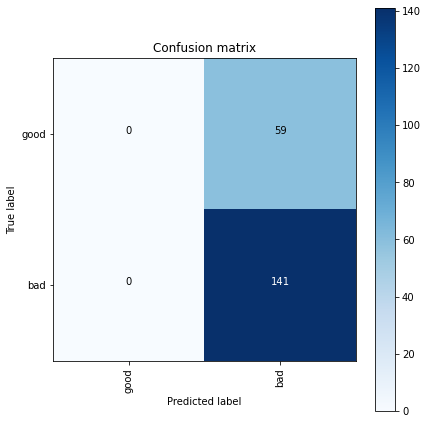

In [75]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)
Y_pred = linear_svc.predict(X_test)
cf = confusion_matrix(y_test , Y_pred)
acc_linear_svc= accuracy_score(y_test , Y_pred)* 100
print("accuracy : {} %".format(acc_linear_svc ))
plot_confusion_matrix(cf,['good','bad'])

# Decision Tree

accuracy : 64.5 %


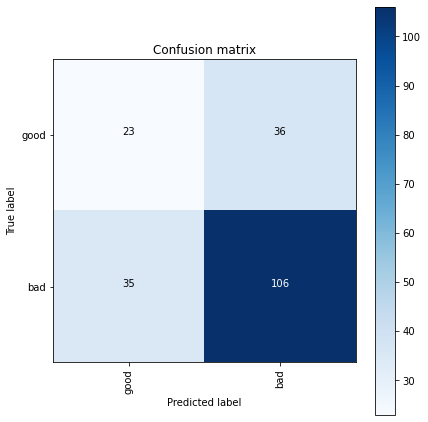

In [76]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
Y_pred = decision_tree.predict(X_test)
cf = confusion_matrix(y_test , Y_pred)
acc_decision_tree= accuracy_score(y_test , Y_pred)* 100
print("accuracy : {} %".format(acc_decision_tree ))
plot_confusion_matrix(cf,['good','bad'])

# Stochastic Gradient Descent

accuracy : 70.5 %


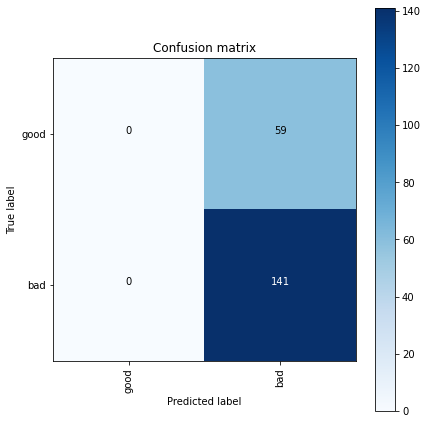

In [77]:
sgd = SGDClassifier()
sgd.fit(X_train, y_train)
Y_pred = sgd.predict(X_test)
cf = confusion_matrix(y_test , Y_pred)
acc_sgd= accuracy_score(y_test , Y_pred)* 100
print("accuracy : {} %".format(acc_sgd ))
plot_confusion_matrix(cf,['good','bad'])

# Random Forest

accuracy : 69.5 %


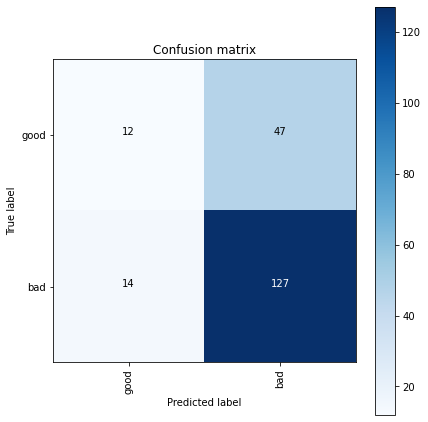

In [78]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
Y_pred = random_forest.predict(X_test)
cf = confusion_matrix(y_test , Y_pred)
acc_random_forest= accuracy_score(y_test , Y_pred)* 100
print("accuracy : {} %".format(acc_random_forest ))
plot_confusion_matrix(cf,['good','bad'])

In [79]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines','grid search' ,'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc,acc_grid, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
0,Support Vector Machines,71.5
1,grid search,71.5
6,Perceptron,70.5
7,Stochastic Gradient Decent,70.5
8,Linear SVC,70.5
4,Random Forest,69.5
3,Logistic Regression,67.5
5,Naive Bayes,64.5
9,Decision Tree,64.5
2,KNN,62.5
